# <CENTER> EVALUACIÓN

In [1]:
# Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score


# Cargamos models
lr = joblib.load('../artifacts/logistic_regression.pkl')
rf = joblib.load('../artifacts/random_forest_classifier.pkl')
xgb = joblib.load('../artifacts/xgboost_classifier.pkl')

# Cargamos data de test
test = pd.read_csv('../data/processed/test.csv', sep = ',')

X_test = test.drop('Class', axis=1)
y_test = test['Class']

## IMPORTANTE <br>
Para poder realizar el respectivo análisis de performance de cada modelo, tenemos que realizar sus predicciones correspondientes.

In [2]:
# Predecimos 
y_pred_lr = lr.predict(X_test)      # Predicciones para el modelo LogisticRegression
y_pred_rf = rf.predict(X_test)      # Predicciones para el modelo RandomForestClassifier
y_pred_xgb = xgb.predict(X_test)    # Predicciones para el modelo XGBoostClassifier

In [3]:
# Confusión Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

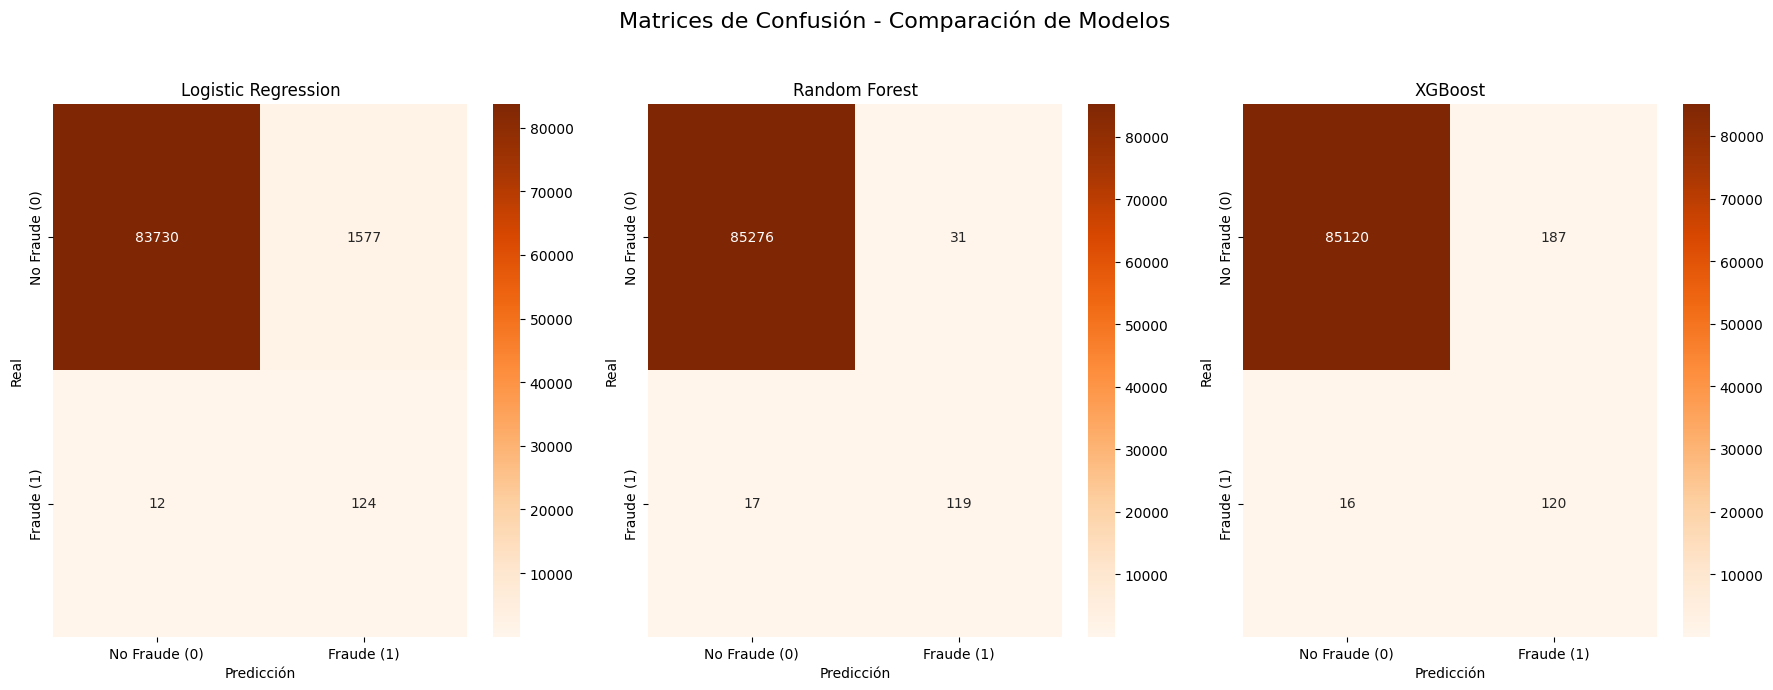

In [4]:
# Lista de matrices de confusión
cms = [cm_lr, cm_rf, cm_xgb]  
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Títulos de ejes
xticks = ['No Fraude (0)', 'Fraude (1)']
yticks = ['No Fraude (0)', 'Fraude (1)']

# Plot de cada matriz
for ax, cm, name in zip(axes, cms, model_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=xticks, yticklabels=yticks, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

plt.suptitle('Matrices de Confusión - Comparación de Modelos', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Observaciones matriz de confusión:**
- **TN (Verdaderos Negativos)**: El modelo clasificó correctamente los casos que **no son fraude** (0).
- **FP (Falsos Positivos)**: El modelo predijo fraude, pero en realidad **no lo era**.
- **TP (Verdaderos Positivos)**: El modelo clasificó correctamente los casos de fraude (1).
- **FN (Falsos Negativos)**: El modelo predijo que **no era fraude**, pero en realidad **sí lo era**.

**Como podemos ver en las matrices, el modelo de RandomForestClassifier tuvo una mejor performance que LogisticRegression y XGBoostClassifier.**


## **Clasification Report**

In [5]:
# Calculamos el reporte de clasificación de cada modelo.
report_lr = classification_report(y_test, y_pred_lr, target_names=['Not Fraud', 'Fraud'])
report_rf = classification_report(y_test, y_pred_rf, target_names=['Not Fraud', 'Fraud'])
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Not Fraud', 'Fraud'])

In [6]:
print('######### Clasification report - LogisticRegression #########')
print(report_lr)
print('######### Clasification report - RandomForestClassifier #########')
print(report_rf)
print('######### Clasification report - XGBoostClassfier #########')
print(report_xgb)

######### Clasification report - LogisticRegression #########
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     85307
       Fraud       0.07      0.91      0.14       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

######### Clasification report - RandomForestClassifier #########
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85307
       Fraud       0.79      0.88      0.83       136

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443

######### Clasification report - XGBoostClassfier #########
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85307
       Fraud       0.39      0.88      0.54      

#### **Observaciones Reporte:**
- **Precisión:** Si queremos evitar causar a alguien por error, importa alta precisión.
- **Recall:** Si queremos detectar mayor cantidad de fraudes, importa un alto recall.
- **F1 Score:** Es útil cuando tenemos clases desbalanceadas y necesitamos equilibrar.

**Haciendo un balance entre la información que nos muestra el reporte de clasifiación, el modelo de RandomForestClassifier tiene los mejores resultados a la hora de enfrentar este tipo de problemas.** 

## **ROC-AUC**

In [7]:
# 1. Obtener las probabilidades de la clase positiva
y_scores_lr = lr.predict_proba(X_test)[:,1]  # Probabilidad de clase "1" (fraud)
y_scores_rf = rf.predict_proba(X_test)[:,1]  # Probabilidad de clase "1" (fraud)
y_scores_xgb = xgb.predict_proba(X_test)[:,1]  # Probabilidad de clase "1" (fraud)


# 2. Calcular ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_scores_lr)
roc_auc_rf = roc_auc_score(y_test, y_scores_rf)
roc_auc_xgb = roc_auc_score(y_test, y_scores_xgb)

roc_auc_models = [roc_auc_lr, roc_auc_rf, roc_auc_xgb]

print(f"ROC-AUC para LogisticRegressionClassifier: {roc_auc_lr:.4f}")
print(f"ROC-AUC para RandomForestClassifier: {roc_auc_rf:.4f}")
print(f"ROC-AUC para XGBoostClassifier: {roc_auc_xgb:.4f}")

ROC-AUC para LogisticRegressionClassifier: 0.9766
ROC-AUC para RandomForestClassifier: 0.9815
ROC-AUC para XGBoostClassifier: 0.9863


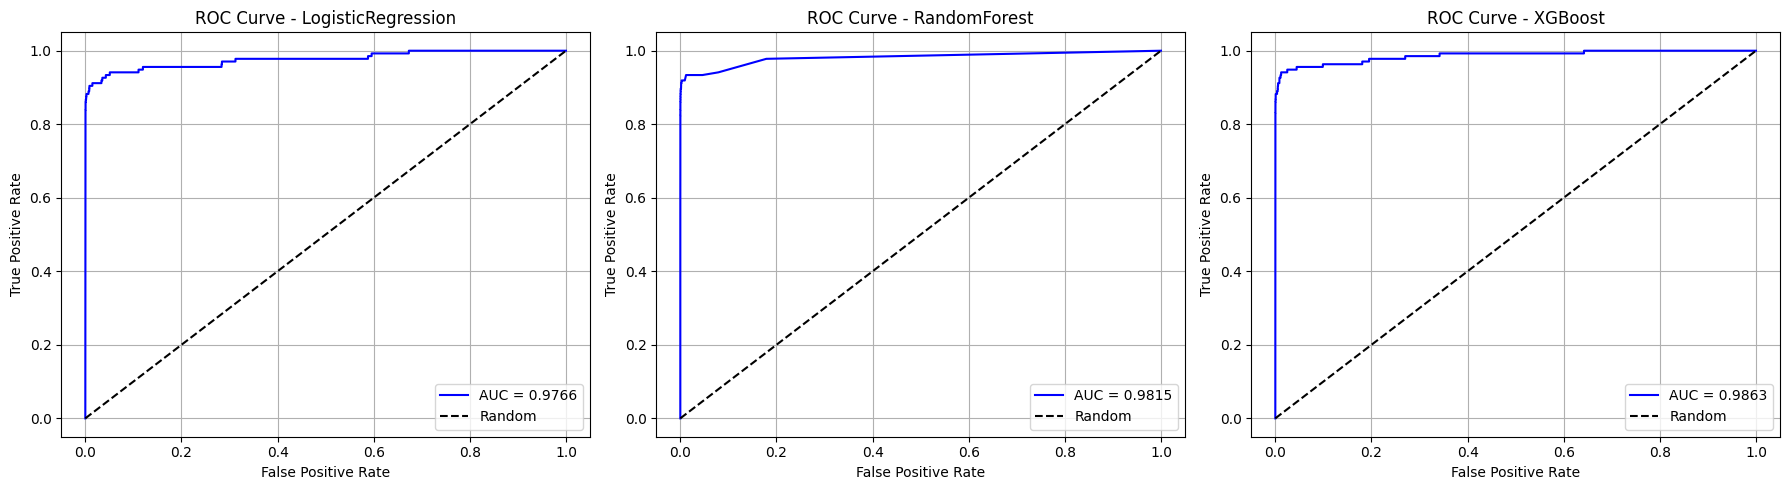

In [8]:
# 3. Graficar la curva ROC

# Diccionario de modelos y sus predicciones
model_scores = {
    "LogisticRegression": y_scores_lr,
    "RandomForest": y_scores_rf,
    "XGBoost": y_scores_xgb
}

# Crear subplots: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar por modelos y ejes
for ax, (name, y_scores) in zip(axes, model_scores.items()):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    ax.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
    ax.plot([0, 1], [0, 1], 'k--', label='Random')
    ax.set_title(f'ROC Curve - {name}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout()
plt.show()

## 📊 Comparativa de Modelos de Clasificación - Detección de Fraude

| Modelo              | Recall (Fraud) | Precision (Fraud) | F1-Score (Fraud) | AUC-ROC |
|---------------------|----------------|--------------------|------------------|---------|
| Logistic Regression | 0.91           | 0.07               | 0.14             | ~0.91   |
| Random Forest       | 0.88           | 0.79               | 0.83             | ~0.99   |
| XGBoost             | 0.88           | 0.39               | 0.54             | ~0.96   |

<br>
> **Nota**: Las métricas corresponden exclusivamente a la clase minoritaria ("Fraud").

---

## 🧾 Conclusiones

- **Random Forest obtuvo el mejor rendimiento general**, logrando un excelente equilibrio entre **recall (0.88)** y **precision (0.79)**. Su **F1-score de 0.83** y **AUC-ROC de aproximadamente 0.99** lo posicionan como la mejor opción para abordar el problema de detección de fraude, minimizando tanto los falsos negativos como los falsos positivos.

- **Logistic Regression**, si bien logró el **recall más alto (0.91)**, presentó una **precisión extremadamente baja (0.07)**. Esto implica una gran cantidad de falsos positivos, lo cual puede generar alertas innecesarias y sobrecargar los recursos operativos. A pesar de tener un AUC aceptable (~0.91), su pobre precisión hace que no sea adecuado para este caso.

- **XGBoost** mostró un desempeño intermedio, con un **recall alto (0.88)** y una **precisión mejor que Logistic (0.39)**. Su **AUC (~0.96)** indica una buena capacidad de discriminación, aunque su F1-score (0.54) sigue por debajo de Random Forest.

---

## ✅ Recomendación Final

> Se recomienda implementar el modelo **Random Forest** como base para la solución de detección de fraude. Además, se sugiere explorar ajustes en el umbral de decisión para optimizar el trade-off entre recall y precision según el contexto del negocio.


In [ ]:
# Supongamos que ya tenés tus modelos entrenados
models = {
    "LogisticRegression": lr,
    "RandomForest": rf,
    "XGBoost": xgb
}

# Y los respectivos scores para comparación 
scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    # También podrías usar f1_score(y_test, y_pred, average='macro') si querés macro promedio
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Asumiendo que 1 = "Fraud"
    scores[name] = f1

# Encontrar el modelo con mejor F1
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]

print(f"✅ Mejor modelo: {best_model_name} con F1-score: {scores[best_model_name]:.4f}")

# Guardar el mejor modelo
joblib.dump(best_model, '../artifacts/best_model.pkl')
print("📦 Modelo guardado exitosamente como best_model.pkl")

✅ Mejor modelo: RandomForest con F1-score: 0.8322
📦 Modelo guardado exitosamente como best_model.pkl
